In [1]:
from noise import add_background_noise
import numpy as np

# Generate example transient data
data = np.random.random((32, 32, 100))  # Example data: 32x32 pixels, 100 time bins

# Desired SBR
sbr = 10.0

# Copy the original data for comparison
original_data = data.copy()

# Add background noise
modified_data = add_background_noise(data, sbr, inplace=False)

# Calculate signal and background sums
signal_sum = np.sum(original_data, axis=-1, keepdims=True)
background_sum = np.sum(modified_data - original_data, axis=-1, keepdims=True)

# Calculate the new SBR
calculated_sbr = signal_sum / background_sum

print(f"Desired SBR: {sbr}")
print(f"Calculated SBR: \n{calculated_sbr}")


Desired SBR: 10.0
Calculated SBR: 
[[[10.]
  [10.]
  [10.]
  ...
  [10.]
  [10.]
  [10.]]

 [[10.]
  [10.]
  [10.]
  ...
  [10.]
  [10.]
  [10.]]

 [[10.]
  [10.]
  [10.]
  ...
  [10.]
  [10.]
  [10.]]

 ...

 [[10.]
  [10.]
  [10.]
  ...
  [10.]
  [10.]
  [10.]]

 [[10.]
  [10.]
  [10.]
  ...
  [10.]
  [10.]
  [10.]]

 [[10.]
  [10.]
  [10.]
  ...
  [10.]
  [10.]
  [10.]]]


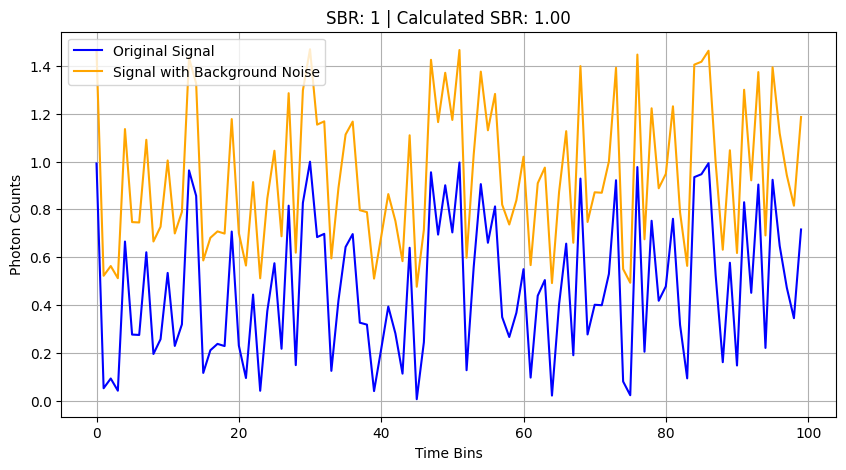

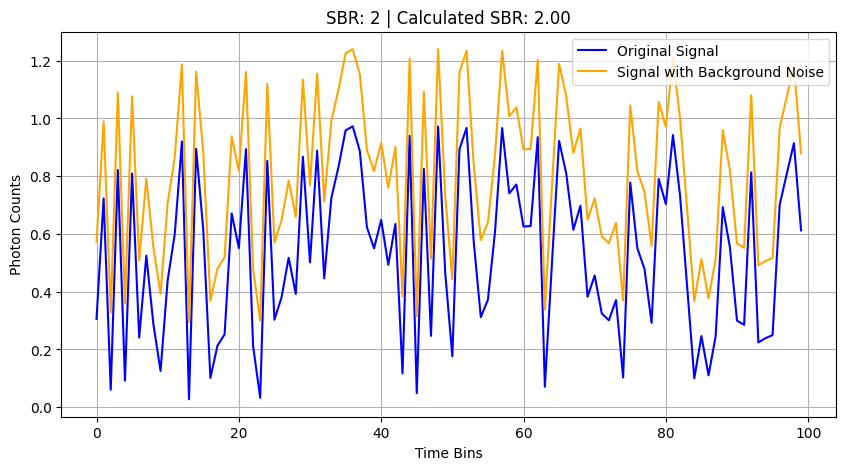

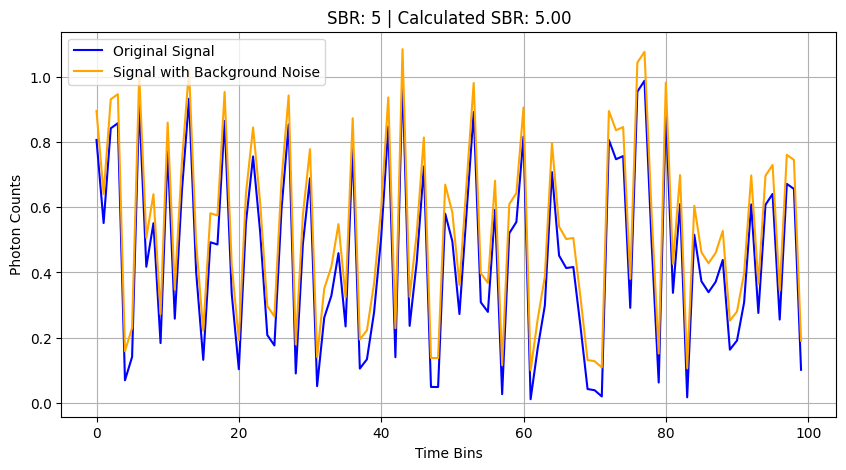

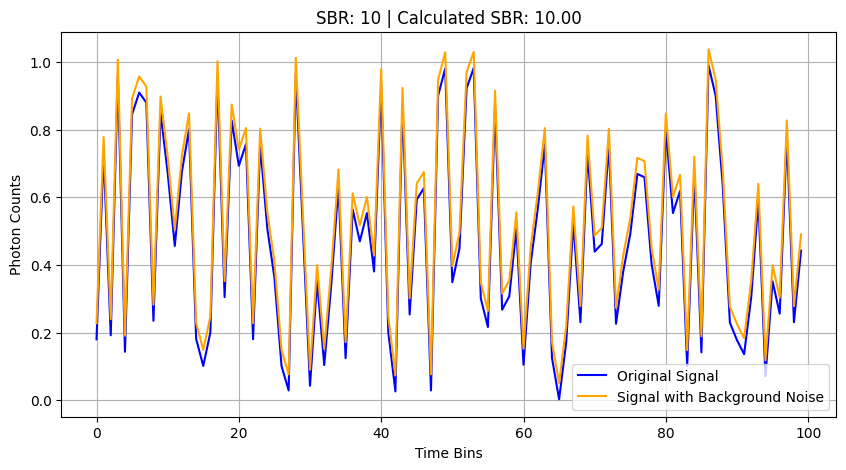

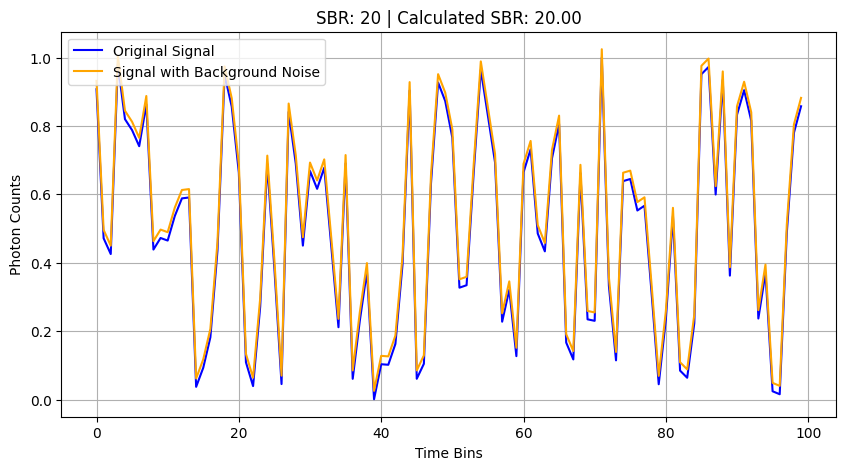

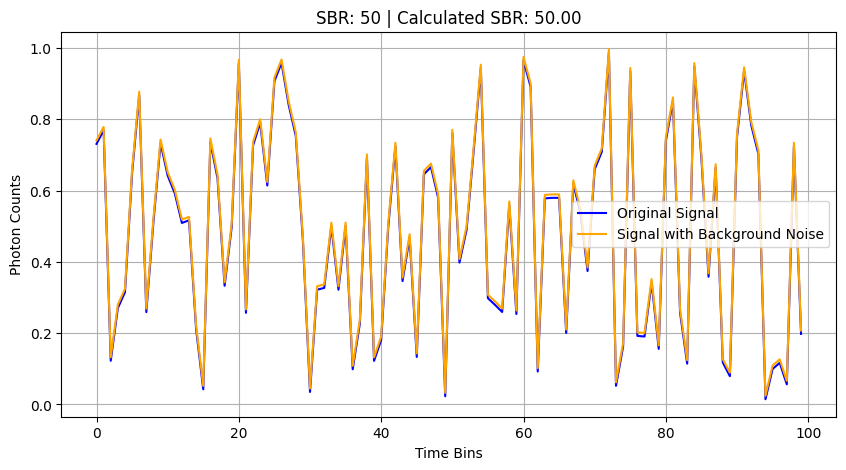

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from noise import add_background_noise

# Function to generate and visualize data with different SBR values
def visualize_sbr_effect(data_shape=(32, 32, 100), sbr_values=[1, 2, 5, 10, 20, 50]):
    # Generate example transient data
    data = np.random.random(data_shape)  # Random data: 32x32 pixels, 100 time bins

    # Loop through each SBR value
    for sbr in sbr_values:
        # Copy the original data for comparison
        original_data = data.copy()

        # Add background noise
        modified_data = add_background_noise(data, sbr, inplace=False)

        # Calculate signal and background sums
        signal_sum = np.sum(original_data, axis=2, keepdims=True)
        background_sum = np.sum(modified_data - original_data, axis=2, keepdims=True)

        # Calculate the new SBR
        calculated_sbr = signal_sum / background_sum

        # Plot a random pixel's temporal response before and after adding noise
        pixel_x, pixel_y = np.random.randint(0, data_shape[0]), np.random.randint(0, data_shape[1])
        time_bins = np.arange(data_shape[-1])

        plt.figure(figsize=(10, 5))
        plt.plot(time_bins, original_data[pixel_x, pixel_y, :], label="Original Signal", color='blue')
        plt.plot(time_bins, modified_data[pixel_x, pixel_y, :], label="Signal with Background Noise", color='orange')
        plt.title(f"SBR: {sbr} | Calculated SBR: {calculated_sbr[pixel_x, pixel_y, 0]:.2f}")
        plt.xlabel("Time Bins")
        plt.ylabel("Photon Counts")
        plt.legend()
        plt.grid(True)
        plt.show()

# Run the visualization function with different SBR values
visualize_sbr_effect()


In [22]:
!pip install plotly

  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)


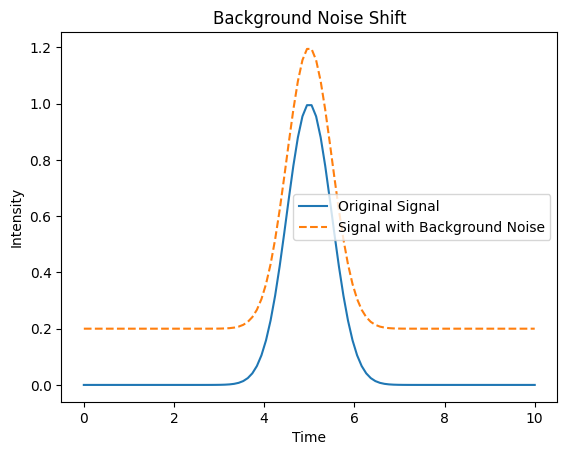

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated signal: a peak with some random noise
np.random.seed(0)
time_bins = np.linspace(0, 10, 100)
signal = np.exp(-((time_bins - 5) ** 2) / 0.5)  # Gaussian-shaped signal

# Add background noise
background_noise = 0.2  # Constant background noise level
noisy_signal = signal + background_noise

# Plot the signal with background noise
plt.plot(time_bins, signal, label='Original Signal')
plt.plot(time_bins, noisy_signal, label='Signal with Background Noise', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.legend()
plt.title('Background Noise Shift')
plt.show()
